In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from data_analysis.utils import user
from data.paths.parquet_paths import USER, REVIEW

In [2]:
user_df = pd.read_parquet(str(USER))
review_df = pd.read_parquet(str(REVIEW))

In [3]:
user_df = user.prepare_user_df(user_df)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   name                10000 non-null  object        
 2   review_count        10000 non-null  int32         
 3   yelping_since       10000 non-null  datetime64[ns]
 4   friends             10000 non-null  object        
 5   useful              10000 non-null  int32         
 6   funny               10000 non-null  int32         
 7   cool                10000 non-null  int32         
 8   fans                10000 non-null  int32         
 9   elite               0 non-null      object        
 10  average_stars       10000 non-null  float32       
 11  compliment_hot      10000 non-null  int32         
 12  compliment_more     10000 non-null  int32         
 13  compliment_profile  10000 non-null  int32      

In [4]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [5]:
user_columns = [
    'user_id',
    'name',
    'review_count',
    'yelping_since',
    # 'useful',
    # 'funny',
    # 'cool',
    'fans',
    'average_stars'
]


review_user_df = review_df.join(user_df[user_columns].set_index('user_id'), on='user_id')
review_user_df['date'] = pd.to_datetime(review_user_df['date'])

In [6]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      100000 non-null  object        
 1   user_id        100000 non-null  object        
 2   business_id    100000 non-null  object        
 3   stars          100000 non-null  float32       
 4   date           100000 non-null  datetime64[ns]
 5   text           100000 non-null  object        
 6   useful         100000 non-null  int32         
 7   funny          100000 non-null  int32         
 8   cool           100000 non-null  int32         
 9   name           8279 non-null    object        
 10  review_count   8279 non-null    float64       
 11  yelping_since  8279 non-null    datetime64[ns]
 12  fans           8279 non-null    float64       
 13  average_stars  8279 non-null    float32       
dtypes: datetime64[ns](2), float32(2), float64(2), int32(3

In [7]:
review_user_df = review_user_df.loc[~review_user_df['name'].isna()].copy()

In [8]:
review_user_df.sample(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars
33314,wUI_UcXvfAX_PAKBJKVweA,WnzRueYdRWNSbkXB0_0i4Q,7EZ4Eu7YJ1ltRCC5jXFJrQ,4.0,2009-08-04,It's much cheaper than other buffets I believe...,2,0,0,Chuck,1193.0,2008-07-31 21:46:49,85.0,4.02
50750,r-9ctomg9cBGS8LdFXPuWg,EISLZc8nqFk5ZNaX8gCrwA,AqpiBApzrd30LA-vmU3Rvw,3.0,2008-04-29,"well, what a wonderful place and i would go to...",0,1,0,Peetle,54.0,2007-10-30 04:23:47,1.0,3.35


In [9]:
youth_threshold = timedelta(days=60)
early_reviews = review_user_df[review_user_df.date - review_user_df.yelping_since < youth_threshold]

early_reviews[['date', 'yelping_since', 'stars', 'user_id']].sample(10)

early_reviews = early_reviews.groupby('user_id').agg(list)
early_reviews.reset_index(inplace=True)
early_reviews['count'] = early_reviews['name'].apply(lambda x: len(x))
early_reviews[early_reviews['count'] >= 3].sample(3)

,user_id,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
393,eavBO3KRzBf8sM6KGa_-NQ,"[7Ajvs5Au1ajntMkatl81nQ, 6QS4i-qV9P1se4AeHZFuv...","[5nZVVPO_cYH9aQeClTP9zA, v8-d4GjT_sFiC2RXb3UJS...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]","[2007-06-27 00:00:00, 2007-05-25 00:00:00, 200...",[Sauce is just my pace. It's a relaxed atmosph...,"[2, 3, 0, 3, 0, 5, 0]","[0, 0, 1, 1, 0, 0, 0]","[1, 0, 2, 3, 0, 1, 0]","[Ann Marie, Ann Marie, Ann Marie, Ann Marie, A...","[215.0, 215.0, 215.0, 215.0, 215.0, 215.0, 215.0]","[2007-05-24 21:21:09, 2007-05-24 21:21:09, 200...","[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]","[3.9200000762939453, 3.9200000762939453, 3.920...",7
272,TQXtrSpsUyvHMriX8hvNWQ,"[09x5jSdqrQaoVUN8ZEZkOA, onsJVIqA3CR3VUDOmup2r...","[osSwv6CJy5hDKQdOKeyTow, N_sYl9Uzshx1PG6_I0H9W...","[4.0, 4.0, 3.0]","[2006-11-05 00:00:00, 2006-11-21 00:00:00, 200...",[As a young sushi eater i fell in love with Ru...,"[2, 3, 3]","[0, 0, 1]","[0, 0, 0]","[Erin, Erin, Erin]","[144.0, 144.0, 144.0]","[2006-11-02 23:44:25, 2006-11-02 23:44:25, 200...","[23.0, 23.0, 23.0]","[3.809999942779541, 3.809999942779541, 3.80999...",3
186,JCBBmqUxWeEX8Y0tmYgD8g,"[3tJA9OT6UxQFXn6CppTkIw, -3yHFkCcBJ46gcp6wB1yg...","[oUso4QWH1OAXboD8IMjpFQ, OIL90Y4d7Zvko3YwyQUmY...","[4.0, 4.0, 4.0, 4.0]","[2008-12-05 00:00:00, 2008-12-17 00:00:00, 200...",[oh yum. My bf has been wanting good mexican f...,"[2, 0, 3, 3]","[1, 0, 1, 2]","[1, 0, 2, 2]","[Danni, Danni, Danni, Danni]","[152.0, 152.0, 152.0, 152.0]","[2008-11-30 23:42:09, 2008-11-30 23:42:09, 200...","[10.0, 10.0, 10.0, 10.0]","[4.170000076293945, 4.170000076293945, 4.17000...",4


In [10]:
review_bursts = review_user_df.groupby(['user_id', 'date']).agg(list)
review_bursts.reset_index(inplace=True)
review_bursts['count'] = review_bursts['name'].apply(lambda x: len(x))
review_bursts[review_bursts['count'] >= 3].sample(3)

,user_id,date,review_id,business_id,stars,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
4442,Yp7_GeD6KTRoo4Nteqv4SA,2008-12-04,"[jThHNyO8oHs8CrncwzHhKQ, o6yLz-tcuLe65HhXkjuv1...","[Qit5T2k6_gcu4BH4EYTsVw, sjJOsKnXxsQodXMr1i8fs...","[5.0, 3.0, 4.0]",[Going to the Toronto Island on a summer day i...,"[4, 0, 2]","[1, 0, 2]","[1, 0, 0]","[Melissa, Melissa, Melissa]","[327.0, 327.0, 327.0]","[2008-10-12 21:24:42, 2008-10-12 21:24:42, 200...","[14.0, 14.0, 14.0]","[3.640000104904175, 3.640000104904175, 3.64000...",3
4937,c8qFkI_VusWo0xZvkjfBWQ,2005-05-26,"[aG8DkGSVcvIchm7mjDjzYw, euU8avFp6j1noN70fulyl...","[ODTI9W7fHMKNWZ3g8VcFUg, gn8cZOxQIZNUeiHcJ0WxM...","[3.0, 3.0, 3.0, 5.0, 3.0]",[I thought the food here to be a little on the...,"[1, 0, 0, 0, 0]","[0, 0, 1, 0, 0]","[1, 0, 1, 0, 0]","[matthew, matthew, matthew, matthew, matthew]","[366.0, 366.0, 366.0, 366.0, 366.0]","[2005-05-14 16:32:28, 2005-05-14 16:32:28, 200...","[21.0, 21.0, 21.0, 21.0, 21.0]","[3.8299999237060547, 3.8299999237060547, 3.829...",5
4867,benfF2qIwxDz7TCeF1XWIA,2011-03-23,"[jsPyjDJcX4QwwDuN0asQ0A, dqJdyOJTyVzDMD46ITV2G...","[k7VQD0pbdFN0Ju0yNVrtZQ, 7L7frgS9I4KeTkqPXh7w2...","[2.0, 5.0, 2.0]",[the waitresses are salty.\nthe food is medioc...,"[2, 3, 1]","[1, 0, 1]","[0, 1, 0]","[Tom, Tom, Tom]","[60.0, 60.0, 60.0]","[2011-03-23 00:21:53, 2011-03-23 00:21:53, 201...","[5.0, 5.0, 5.0]","[4.099999904632568, 4.099999904632568, 4.09999...",3


In [11]:
# ~14 years * ~50 weeks
bins_count = 700
review_user_df['date_bin'] = pd.cut(review_user_df['date'], bins=bins_count, labels=range(bins_count))

review_bursts_binned = review_user_df.groupby(['user_id', 'date_bin']).agg(list)
review_bursts_binned.reset_index(inplace=True)
review_bursts_binned = review_bursts_binned.dropna()
review_bursts_binned['count'] = review_bursts_binned['name'].apply(lambda x: len(x))
review_bursts_binned[review_bursts_binned['count'] >= 3].sample(3)

,user_id,date_bin,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
932650,H0Vpod3MzV_Z4FOggWMIvQ,250,"[VqRpq82ArcZcjCRiA6pTBA, HAwtpE7ZjH9D_JMHKX1Ww...","[ursDrWED3OpHKZXTDE1FPg, QjKGdLmsQuEtit_U7iqKg...","[4.0, 4.0, 4.0]","[2010-01-14 00:00:00, 2010-01-10 00:00:00, 201...",[I have only ever heard raves about The Lazy L...,"[0, 2, 1]","[0, 0, 0]","[0, 0, 0]","[Zoe, Zoe, Zoe]","[273.0, 273.0, 273.0]","[2009-11-12 14:51:11, 2009-11-12 14:51:11, 200...","[21.0, 21.0, 21.0]","[3.880000114440918, 3.880000114440918, 3.88000...",3
1755859,Wx7cbLDqYEL3_aVZwh82Ww,259,"[ExOG_DLTfJoDVXzts_KWuA, mV9Zjw-NV31d2qg5tEkvq...","[TJ3MrS3I2IHhdQu2gxbmtg, QjKGdLmsQuEtit_U7iqKg...","[5.0, 2.0, 3.0]","[2010-03-18 00:00:00, 2010-03-18 00:00:00, 201...",[Although I have never actually stayed at Hote...,"[1, 2, 0]","[0, 5, 0]","[1, 2, 0]","[Sapna, Sapna, Sapna]","[1117.0, 1117.0, 1117.0]","[2009-05-07 21:20:37, 2009-05-07 21:20:37, 200...","[125.0, 125.0, 125.0]","[3.9200000762939453, 3.9200000762939453, 3.920...",3
791179,EK8MTw_sYvMssXvyux7VgQ,179,"[ndPj6d-ee8kI6ixqdGef_Q, iROuQzYAwi06SOleKm0Pf...","[9oeXU6ji4o6yDlA2Ga8iug, Cy9LmQrY9rWwaNTSqxQn6...","[4.0, 4.0, 5.0, 4.0]","[2008-08-26 00:00:00, 2008-08-26 00:00:00, 200...",[Okay so once in a while I don't feel like squ...,"[6, 1, 1, 0]","[9, 0, 2, 1]","[2, 0, 2, 0]","[Erin, Erin, Erin, Erin]","[124.0, 124.0, 124.0, 124.0]","[2008-08-21 15:09:34, 2008-08-21 15:09:34, 200...","[16.0, 16.0, 16.0, 16.0]","[3.7300000190734863, 3.7300000190734863, 3.730...",4


In [12]:
early_reviewers = set(early_reviews['user_id'])
oneday_burst_reviewers = set(review_bursts['user_id'])
oneweek_burst_reviewers = set(review_bursts_binned['user_id'])

print(f'1d / 1w: {len(oneday_burst_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1w: {len(early_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1d: {len(early_reviewers.intersection(oneday_burst_reviewers))}')

1d / 1w: 4692
early / 1w: 558
early / 1d: 558


In [13]:
# mark users as review_bursters (let's peek early and daily)

review_bursters = set(pd.concat([early_reviews[early_reviews['count'] >= 3]['user_id'], 
                             review_bursts['user_id']])
                             .drop_duplicates())

user_df['is_burster'] = user_df['user_id'].apply(lambda x: x in review_bursters)
user_df[['user_id', 'is_burster']].sample(10)

,user_id,is_burster
54,fdwVdy6TuY1kjYeEPMZKVw,True
6869,BxXEXnFX8xeG7Y56-XXHZg,True
8712,QwX2Wcq80uC9140G5n-vnA,False
1499,sHXN54oN7QFSIiOcS3lUgA,False
8395,vgkevqurpV4oZur0ThA-pQ,True
8256,ODZxY8BgOKkwJropDUqzBw,True
4627,6_GviXBB7Bx3lFoveIfFwQ,True
2992,GB3qwSzhx2d8DmDSImBWdg,True
6033,jQjuysPsJRdeUGkvSEIOcA,True
2553,kVAy8nol_GefMbR7awm5TA,False


In [14]:
# create regression model on bursters

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
user_lr = user_df.drop(['user_id', 'friends', 'name', 'yelping_since'], axis=1)
user_lr['elite'] = user_lr['elite'].dropna().apply(len)
user_lr['elite'] = user_lr['elite'].fillna(0)
user_lr

,review_count,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,is_burster
0,32,40,10,11,1,0,2.44,0,1,0,0,0,2,1,0,0,0,0,False
1,1117,3617,1507,1619,125,0,3.92,56,17,13,17,3,62,117,172,172,78,19,True
2,160,288,94,62,1,0,3.16,3,0,0,0,0,7,9,6,6,8,0,True
3,18,47,2,17,7,0,4.80,2,0,0,1,0,0,1,1,1,1,0,True
4,44,54,11,11,3,0,3.53,1,0,2,1,0,0,1,1,1,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,196,207,33,59,7,0,3.87,4,2,0,0,0,0,0,8,8,5,0,False
9996,26,62,13,12,5,0,3.69,0,0,0,0,0,0,0,1,1,0,0,False
9997,248,299,123,97,14,0,4.03,0,1,1,0,0,6,30,6,6,3,0,True
9998,17,37,1,6,0,0,4.00,0,0,0,0,0,1,0,0,0,0,0,True


In [16]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = get_train_data(user_lr, 'is_burster', 0.3)

In [18]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [19]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.000, test: 0.000
R^2 train: 1.000, test: 1.000


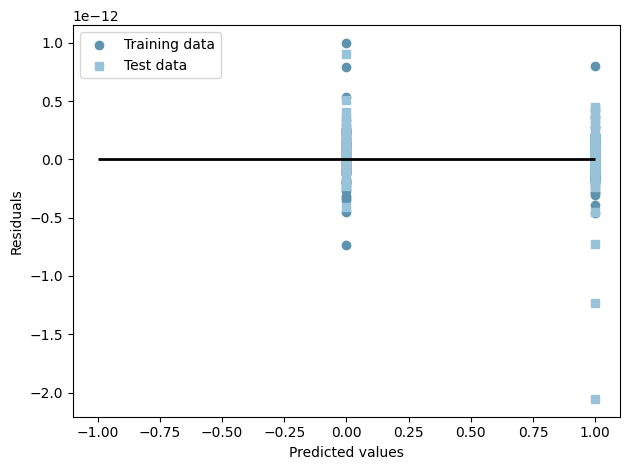

In [20]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-1, xmax=1, lw=2, color='#000000')
plt.tight_layout()